Downloading yfinance

In [2]:
pip install --quiet yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --quiet pandas_datareader

Note: you may need to restart the kernel to use updated packages.


Importing libraries for the project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf # for connecting to Yahoo Finance to ge real stock prices
from pandas_datareader import data as pdr # used in case yahoo finance is down
import datetime as dt  
import time # add delays or tracks time
from scipy import stats


In [5]:
#applying white grid theme to all graphs using seaborn
sns.set_style('whitegrid')

In [6]:
#making all created graphs should appear below the code
%matplotlib inline

Downloading the historical data from Yahoo finance

In [7]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
weights = np.array([0.25, 0.25, 0.25, 0.25])
start = dt.datetime(2020,1,1)
end = dt.datetime.today()
#creating an empty table which will be filled by stock prices
prices = pd.DataFrame()
for ticker in tickers:
    print(f"fetching {ticker}..",end =" ")
    try:
        df = yf.Ticker(ticker).history(
            start = start.strftime('%Y-%m-%d'),
            end  =end.strftime('%Y-%m-%d'),
            auto_adjust = True)
        series = df['Close']
        print("Data loaded through yfinance!",end= " ")
    except Exception as e:
         # fallback to Stooq if yfinance fails
        print(f"Cannot load through yfinance ({e}); falling back to Stooq", end="")
        df2 = pdr.DataReader(ticker, 'stooq', start, end)
        df2 = df2.sort_index()
        series = df2['Close']
    #Storing each stock prices in prices dataframe
    prices[ticker] = series
    time.sleep(1)  # pause to respect rate limits
    print()

fetching AAPL.. Data loaded through yfinance! 
Data loaded through yfinance! 
Data loaded through yfinance! 
Data loaded through yfinance! 


In [8]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,93.750000,94.900497,93.207497,94.900497,80580000,0.0,0.0
2020-01-03 00:00:00-05:00,93.224998,94.309998,93.224998,93.748497,75288000,0.0,0.0
2020-01-06 00:00:00-05:00,93.000000,95.184502,93.000000,95.143997,81236000,0.0,0.0
2020-01-07 00:00:00-05:00,95.224998,95.694504,94.601997,95.343002,80898000,0.0,0.0
2020-01-08 00:00:00-05:00,94.902000,95.550003,94.321999,94.598503,70160000,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-29 00:00:00-04:00,231.320007,231.809998,228.160004,229.000000,26199200,0.0,0.0
2025-09-02 00:00:00-04:00,223.520004,226.169998,221.830002,225.339996,38843900,0.0,0.0
2025-09-03 00:00:00-04:00,225.210007,227.169998,224.360001,225.990005,29223100,0.0,0.0


In [9]:
prices


,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2020-01-02 00:00:00-05:00,72.538498,152.791092,68.026016,94.900497
2020-01-03 00:00:00-05:00,71.833282,150.888596,67.670158,93.748497
2020-01-06 00:00:00-05:00,72.405685,151.278625,69.473846,95.143997
2020-01-07 00:00:00-05:00,72.065147,149.899338,69.339653,95.343002
2020-01-08 00:00:00-05:00,73.224411,152.286942,69.833191,94.598503
...,...,...,...,...
2025-08-29 00:00:00-04:00,232.139999,506.690002,212.910004,229.000000
2025-09-02 00:00:00-04:00,229.720001,505.119995,211.350006,225.339996
2025-09-03 00:00:00-04:00,238.470001,505.350006,230.660004,225.990005


In [10]:
prices.describe()

,AAPL,MSFT,GOOGL,AMZN
count,1427.000000,1427.000000,1427.000000,1427.000000
mean,159.522053,306.160133,125.559804,154.499800
std,45.013121,93.594279,36.623161,37.297186
min,54.316936,129.171295,52.392284,81.820000
25%,130.286247,234.728783,97.047966,125.500500
50%,159.891464,287.628845,126.346756,158.128998
75%,189.832298,395.131058,150.111336,178.114250
max,258.103729,534.760925,235.000000,242.059998


In [11]:
# drop leading NaNs if any, then forward-fill/back-fill gaps
prices = prices.dropna(how='all').ffill().bfill()

In [12]:
prices.shape

(1427, 4)

In [13]:
prices.tail()

,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2025-08-29 00:00:00-04:00,232.139999,506.690002,212.910004,229.000000
2025-09-02 00:00:00-04:00,229.720001,505.119995,211.350006,225.339996
2025-09-03 00:00:00-04:00,238.470001,505.350006,230.660004,225.990005
2025-09-04 00:00:00-04:00,239.779999,507.970001,232.300003,235.679993
2025-09-05 00:00:00-04:00,239.690002,495.000000,235.000000,232.330002


# 1. Calculating Daily Log Returns from Stock Prices

In [14]:
#Log-return = Ln(today's price / yesterday's price)
logR = np.log(prices/prices.shift(1)).dropna()

In [15]:
logR.head()

,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2020-01-03 00:00:00-05:00,-0.009770,-0.012530,-0.005245,-0.012213
2020-01-06 00:00:00-05:00,0.007937,0.002582,0.026305,0.014776
2020-01-07 00:00:00-05:00,-0.004714,-0.009159,-0.001933,0.002089
2020-01-08 00:00:00-05:00,0.015958,0.015803,0.007092,-0.007839
2020-01-09 00:00:00-05:00,0.021018,0.012416,0.010443,0.004788


# 2. Visualizing Daily Log Returns (Stock Return Histogram) 

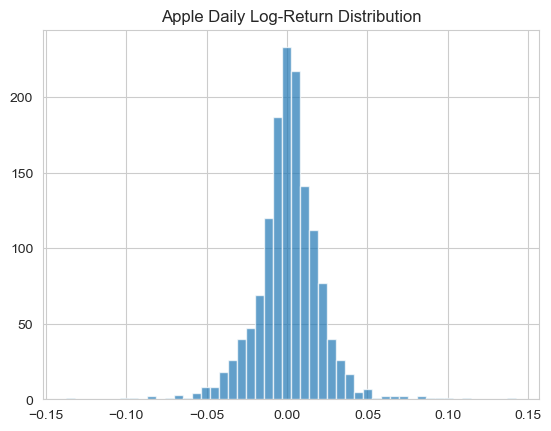

In [16]:
#For Apple stock
logR['AAPL'].hist(bins=50,alpha=0.7)
plt.title('Apple Daily Log-Return Distribution')
plt.show()

Here,
The x-axis (horizontal) shows how much the stock moved (in log return terms)
The y-axis (vertical) shows how often that type of movement happened

#### Analysis of Apple stock:
#### 1. **Most days, the return is close to zero**

* The tallest bars are near the middle (at `0` on the x-axis)
* That means Apple’s price usually **doesn’t change dramatically** — it stays fairly stable day-to-day

**Insight:** Apple is **not wildly volatile**. Most of the time, it gains or loses only a little.


#### 2. **Negative returns are slightly more spread out**

* You may notice the **left side** (negative returns) stretches slightly farther than the right
* This means: while big losses don’t happen often, when they do, they can be **larger** than typical gains

**Insight:** Apple has **occasional larger down days**, which is important when measuring risk (especially Value at Risk or VaR).

#### 3. **Extreme movements are rare**

* Very few bars on the far left or right of the chart
* This means **big jumps or crashes are not common**

**Insight:** Most of the time, Apple behaves predictably — but you still need to prepare for rare “bad days.”



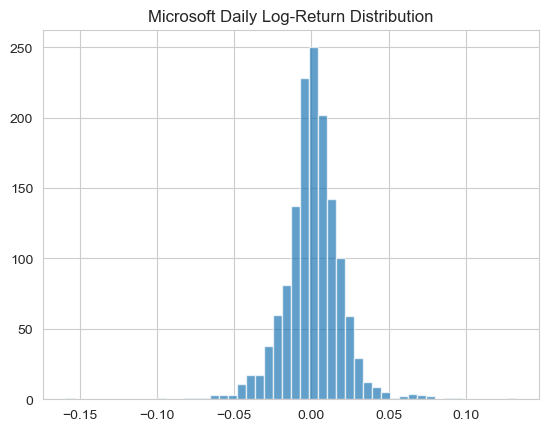

In [17]:
#For Microsoft stock
logR['MSFT'].hist(bins=50,alpha=0.7)
plt.title('Microsoft Daily Log-Return Distribution')
plt.show()

#### Analysis of Microsoft stock
#### 1. Most days the returns are close to 0
* The tallest bar is near to 0
* It means Microsoft is not much volatile, it tends to be stable day-to-day
#### 2. Positive returns are slightly more spread out
* You may notice the **right side** (positive returns) stretches slightly farther than the left
* This means: while big gains don’t happen often, when they do, they can be **larger** than typical losses

**Insight:** Microsoft has **occasional larger gain days**, which can be beneficial for investors.

#### 3. **Extreme movements are rare**

* Very few bars on the far left or right of the chart
* This means **big jumps or crashes are not common**

**Insight:** Most of the time, Microsoft behaves predictably — but you still need to prepare for rare “bad days.”

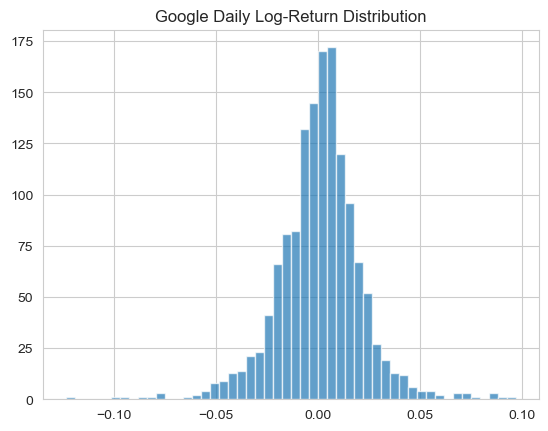

In [18]:
#For Google stock
logR['GOOGL'].hist(bins=50,alpha=0.7)
plt.title('Google Daily Log-Return Distribution')
plt.show()

#### Analysis of Google Stock
#### 1. **Most days, the return is close to zero**

* The tallest bars are near the middle (at `0` on the x-axis)
* That means Google's price usually **doesn’t change dramatically** — it stays fairly stable day-to-day

#### 2. **Negative returns are more spread out than positive gains**
* You may notice the **left side** (negative returns) stretches farther than the right
* This means: while big losses don’t happen often, when they do, they can be **larger** than typical gains.
**Insight:** Google has **occasional larger down days**, which is important when measuring risk (especially Value at Risk or VaR).
#### 3. **Extreme movements are rare**

* Very few bars on the far left or right of the chart
* This means **big jumps or crashes are not common**

**Insight:** Most of the time, Google behaves predictably — but you still need to prepare for rare “bad days.”

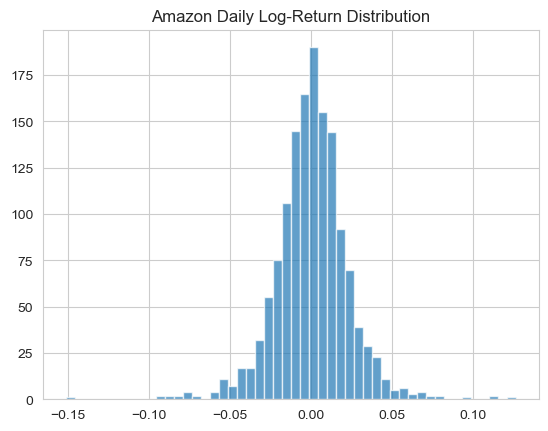

In [19]:
#For Amazon stock
logR['AMZN'].hist(bins=50,alpha=0.7)
plt.title('Amazon Daily Log-Return Distribution')
plt.show()

#### Analysis of Amazon Stock
#### 1. **Most days, the return is close to zero**

* The tallest bars are near the middle (at `0` on the x-axis)
* That means Amazon's price usually **doesn’t change dramatically** — it stays fairly stable day-to-day

#### 2. **Positive returns are slightly more spread out**
* You may notice the **right side** (positive returns) stretches slightly farther than the left
* This means: while big gains don’t happen often, when they do, they can be **larger** than typical losses

**Insight:** Amazon has **occasional larger gain days**, which can be beneficial for investors.

#### 3. **Extreme movements are rare**

* Very few bars on the far left or right of the chart
* This means **big jumps or crashes are not common**

**Insight:** Most of the time, Amazon behaves predictably — but you still need to prepare for rare “bad days.”

# 3. Creating a Summary Table for Daily Stock Returns



In [20]:
summary = pd.DataFrame({
    'Mean':logR.mean(),
    'Variance':logR.var(),
    'Skewness':logR.skew(),
    'Kurtosis':logR.kurtosis()})
                       

In [21]:
summary

,Mean,Variance,Skewness,Kurtosis
AAPL,0.000838,0.000414,0.027522,6.309518
MSFT,0.000824,0.000359,-0.163451,7.693183
GOOGL,0.000869,0.000424,-0.188884,3.764445
AMZN,0.000628,0.000513,-0.102909,4.278261


# 4.1 Fitting a Normal Distribution and Calculating Confidence Intervals

In [22]:
logR.size

5704

In [23]:
# Fit Normal: mean μ, std σ
mu_norm, sigma_norm = logR.stack().mean(), logR.stack().std(ddof=1)

# 95% CI for mean under Normal: μ ± z*·σ/√N
N = logR.size
z95 = stats.norm.ppf(0.975)
ci_mu_norm = (mu_norm - z95*sigma_norm/np.sqrt(N),
              mu_norm + z95*sigma_norm/np.sqrt(N))

# 95% CI for σ via Chi-square:
df = N-1
chi2_low, chi2_high = stats.chi2.ppf([0.025,0.975], df)
ci_sigma_norm = (sigma_norm*np.sqrt(df/chi2_high),
                 sigma_norm*np.sqrt(df/chi2_low))

print("Normal fit:")
print(f"  μ = {mu_norm:.5f}, 95% CI {ci_mu_norm}")
print(f"  σ = {sigma_norm:.5f}, 95% CI {ci_sigma_norm}")

Normal fit:
  μ = 0.00079, 95% CI (np.float64(0.00025364252104631243), np.float64(0.0013262103251899665))
  σ = 0.02067, 95% CI (np.float64(0.02029269611118118), np.float64(0.021051420011239327))


# 4.2 Fitting a Student’s t-Distribution to Stock Returns

In [24]:
# 4.2 Fit Student’s t

# Fit t-distribution to the pooled returns
# returns_flat = all asset returns concatenated
returns_flat = logR.stack().values
df_t, mu_t, sigma_t = stats.t.fit(returns_flat)

In [25]:
df_t # degree of freedom - tells us how “fat” the tails of the distribution are (lower = fatter tails)

np.float64(3.588440887344082)

In [26]:
mu_t #the average of the t-distribution = center of the curve

np.float64(0.0011066009535061249)

In [27]:
sigma_t # the standard deviation (spread) = how wide the curve is

np.float64(0.014174333547924458)

# 5. Estimating Confidence Intervals Using Bootstrapping 

In [28]:
# 95% CI for μ and σ of a t-fit is more complex; we can bootstrap them:
B = 1000
estimates = np.array([stats.t.fit(np.random.choice(returns_flat, size=N, replace=True))
                      for _ in range(B)])


In [29]:
estimates

array([[3.68808569e+00, 9.95761612e-04, 1.42772166e-02],
       [3.46396925e+00, 9.95414916e-04, 1.38971789e-02],
       [3.49099617e+00, 1.44736929e-03, 1.38526397e-02],
       ...,
       [3.40499567e+00, 1.19652769e-03, 1.39817339e-02],
       [3.39263622e+00, 1.20428450e-03, 1.38723064e-02],
       [3.69745143e+00, 1.26348919e-03, 1.44688374e-02]])

In [30]:
ci_mu_t    = np.percentile(estimates[:,1], [2.5,97.5]) #Extract 95% Confidence Interval for the Mean 
ci_sigma_t = np.percentile(estimates[:,2], [2.5,97.5]) #Extract 95% Confidence Interval for the Standard Deviation (σ)

In [31]:
print("\nStudent’s t fit:")
print(f"  df = {df_t:.1f}, μ = {mu_t:.5f},  σ = {sigma_t:.5f}")
print(f"  95% CI for μ (bootstrap): {ci_mu_t}")
print(f"  95% CI for σ (bootstrap): {ci_sigma_t}")


Student’s t fit:
  df = 3.6, μ = 0.00111,  σ = 0.01417
  95% CI for μ (bootstrap): [0.00069219 0.00149909]
  95% CI for σ (bootstrap): [0.01368391 0.01466056]


# 6. Estimating Portfolio Risk and Value at Risk (VaR) Using a Normal Distribution

In [32]:
# Parametric VaR under Normal:
#   VaR = − [ μ_p + σ_p · z_{0.05} ]
# Compute portfolio returns:
portR = logR.dot(weights)

In [33]:
μ_p = portR.mean()       ## where μ_p, σ_p are portfolio mean & vol.
σ_p = portR.std(ddof=1)

In [34]:
z05 = stats.norm.ppf(0.05)
VaR_norm = - (μ_p + σ_p * z05)

In [35]:
VaR_norm

np.float64(0.02857087951340748)

# 7. Calculating Value at Risk (VaR) Using Student’s t Distribution

In [36]:
# Parametric VaR under Student’s t:
#   t05 = t.ppf(0.05, df_t)
t05 = stats.t.ppf(0.05, df_t)


In [37]:
VaR_t = - (mu_t + sigma_t * t05) * 1  # 1-day

In [38]:
VaR_t

np.float64(0.030134695307996156)

# 8. Estimating Value at Risk (VaR) Using Historical Returns

In [39]:
# Historical VaR (non-parametric):
hist_var = -np.percentile(portR, 5)

In [40]:
hist_var

np.float64(0.028731010089493105)

In [41]:
print("1-Day 95% VaR:")
print(f"  Parametric (Normal):       {VaR_norm:.5f}")
print(f"  Parametric (Student’s t):  {VaR_t:.5f}")
print(f"  Historical (5th percentile): {hist_var:.5f}")

1-Day 95% VaR:
  Parametric (Normal):       0.02857
  Parametric (Student’s t):  0.03013
  Historical (5th percentile): 0.02873


# 9. Testing If Your Portfolio Return Is Statistically Significant 

In [42]:
# One-sample t-test: H0: μ=0 vs H1: μ≠0
t_stat, p_val = stats.ttest_1samp(portR, 0.0)
print("One-sample t-test on portfolio daily returns:")
print(f"  t-statistic = {t_stat:.3f},  p-value = {p_val:.3f}")


One-sample t-test on portfolio daily returns:
  t-statistic = 1.671,  p-value = 0.095


In [43]:
if p_val < 0.05:
    print("  → Reject H0: mean return is significantly different from zero.")
else:
    print("  → Fail to reject H0: no evidence mean return ≠ 0.")

  → Fail to reject H0: no evidence mean return ≠ 0.


# 10. Analyzing Correlation and Diversification Benefit in Your Portfolio

## Part A: Create a Correlation Heatmap
* To understand how your stocks move in relation to each other

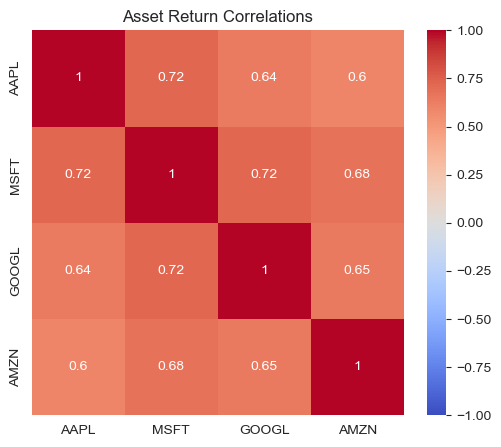

In [44]:
# Correlation & Diversification Benefit
# a) Correlation heatmap
corr = logR.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Asset Return Correlations')
plt.show()

## Part B: Measure the Diversification Benefit
* To measure how much diversification has reduced your portfolio's risk

In [45]:
# b) Diversification benefit
σ_i = logR.std()                         # individual volatilities
σ_weighted = np.dot(weights, σ_i)        # naive weighted avg
σ_portfolio = σ_p                        # from earlier
print(f"Weighted avg σ: {σ_weighted:.4f}")
print(f"Actual portfolio σ: {σ_portfolio:.4f}")
print(f"Diversification benefit: {σ_weighted-σ_portfolio:.4f}")

Weighted avg σ: 0.0206
Actual portfolio σ: 0.0179
Diversification benefit: 0.0028


# 11. Measuring and Visualizing Portfolio Growth & Drawdown

In [49]:
# Max Drawdown
#cum_ret = (prices / prices.iloc[0]).prod(axis=1)  # cumulative portfolio growth?
# Actually for portfolio: cum_port = (portR + 1).cumprod()
cum_port = (portR + 1).cumprod()

rolling_max = cum_port.cummax()
drawdown   = (cum_port - rolling_max) / rolling_max

max_dd = drawdown.min()
end_date = drawdown.idxmin()
start_date = cum_port[:end_date].idxmax()

print(f"Max Drawdown: {max_dd:.2%}")
print(f"From {start_date.date()} to {end_date.date()}")

Max Drawdown: -43.98%
From 2021-12-10 to 2023-01-05


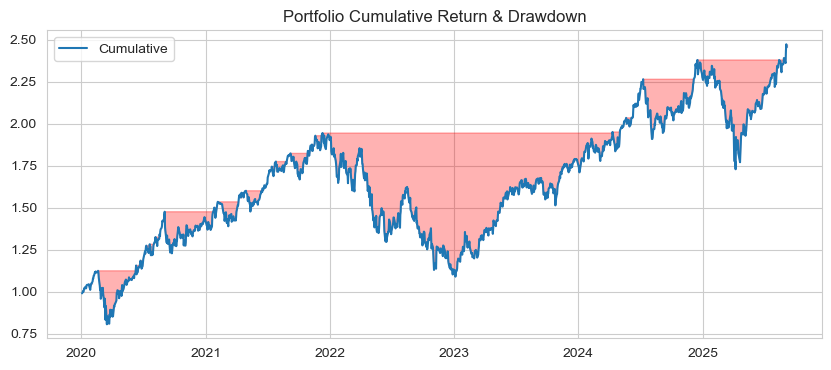

In [50]:
# Plot
plt.figure(figsize=(10,4))
plt.plot(cum_port, label='Cumulative')
plt.fill_between(drawdown.index, cum_port, rolling_max,
                 where=drawdown<0, color='red', alpha=0.3)
plt.title('Portfolio Cumulative Return & Drawdown')
plt.legend()
plt.show()


# 12. How Bad Can Losses Get on Really Bad Days?

In [51]:
# Expected Shortfall (CVaR at 95%)
alpha = 0.05
# Historical ES
es_hist = - portR[portR <= np.percentile(portR, 5)].mean()

In [52]:
# Parametric ES under Normal: μ + σ·φ(z)/α
es_norm = - (μ_p - σ_p * stats.norm.pdf(z05) / alpha)

In [53]:
print(f"Historical ES (95%): {es_hist:.5f}")
print(f"Parametric Normal ES (95%): {es_norm:.5f}")

Historical ES (95%): 0.04165
Parametric Normal ES (95%): 0.03603


# 14. Backtesting Your VaR Model – Does It Really Work?

In [54]:
# VaR Backtesting
var_series = - (portR.rolling(1).mean() + portR.rolling(1).std()*z05)

In [56]:
var_series

Date
2020-01-03 00:00:00-05:00   NaN
2020-01-06 00:00:00-05:00   NaN
2020-01-07 00:00:00-05:00   NaN
2020-01-08 00:00:00-05:00   NaN
2020-01-09 00:00:00-05:00   NaN
                             ..
2025-08-29 00:00:00-04:00   NaN
2025-09-02 00:00:00-04:00   NaN
2025-09-03 00:00:00-04:00   NaN
2025-09-04 00:00:00-04:00   NaN
2025-09-05 00:00:00-04:00   NaN
Length: 1426, dtype: float64

In [57]:
# For simplicity use constant VaR_norm
exceptions = portR < -VaR_norm

In [58]:
exceptions

Date
2020-01-03 00:00:00-05:00    False
2020-01-06 00:00:00-05:00    False
2020-01-07 00:00:00-05:00    False
2020-01-08 00:00:00-05:00    False
2020-01-09 00:00:00-05:00    False
                             ...  
2025-08-29 00:00:00-04:00    False
2025-09-02 00:00:00-04:00    False
2025-09-03 00:00:00-04:00    False
2025-09-04 00:00:00-04:00    False
2025-09-05 00:00:00-04:00    False
Length: 1426, dtype: bool

* This checks:

  > “On how many days was the actual return **worse** than the VaR prediction?”
* `portR < -VaR_norm`:

  * If your return was worse than what your model said was a **95% worst-case**, that's called an **exception**.

You're flagging the days where **real losses were bigger than expected**.


In [59]:
num_exc = exceptions.sum()

exceptions.sum()` counts how many **True values** there are — i.e., how many exceptions

In [62]:
total   = len(portR) #Total no. of trading days in the data

In [63]:
print(f"Exceptions: {num_exc}/{total} days ({num_exc/total:.2%}, expected ~5%)")

Exceptions: 73/1426 days (5.12%, expected ~5%)


#### Insights:

 “Out of 1,343 days, my model said I’d be in trouble about 5% of the time. And that’s **exactly what happened**.”
This means your **risk prediction tool is working well** — it’s realistic, balanced, and dependable.

# 15. Rolling Historical VaR – How Risk Changes Over Time 

> “Rolling VaR is like looking at the past **60 days at a time** to calculate risk.”

In [65]:
# Rolling 60-day VaR
window = 60
roll_var = portR.rolling(window).quantile(0.05).dropna()

In [67]:
roll_var

Date
2020-03-30 00:00:00-04:00   -0.061770
2020-03-31 00:00:00-04:00   -0.061770
2020-04-01 00:00:00-04:00   -0.061770
2020-04-02 00:00:00-04:00   -0.061770
2020-04-03 00:00:00-04:00   -0.061770
                               ...   
2025-08-29 00:00:00-04:00   -0.010132
2025-09-02 00:00:00-04:00   -0.010132
2025-09-03 00:00:00-04:00   -0.010132
2025-09-04 00:00:00-04:00   -0.010132
2025-09-05 00:00:00-04:00   -0.010132
Length: 1367, dtype: float64

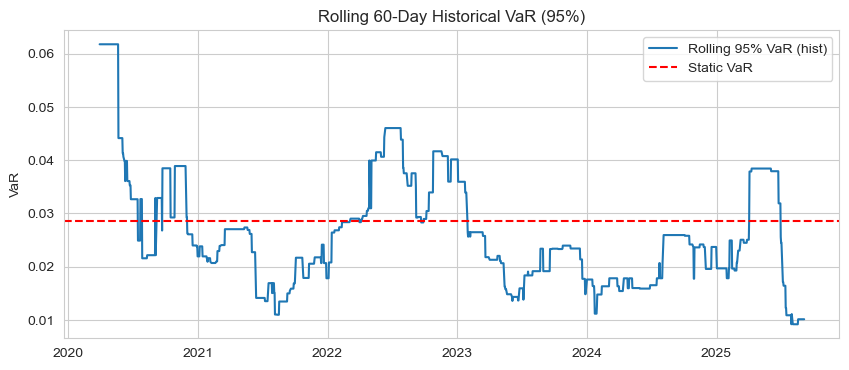

In [69]:
#Plot the Results 
plt.figure(figsize=(10,4))
plt.plot(-roll_var, label='Rolling 95% VaR (hist)')
plt.axhline(VaR_norm, color='red', linestyle='--', label='Static VaR')
plt.title('Rolling 60-Day Historical VaR (95%)')
plt.ylabel('VaR')
plt.legend()
plt.show()

# 16. Testing If Your Returns Follow a Normal Distribution (Jarque-Bera Test) 

In [70]:
# Jarque–Bera Normality Test
jb_stat, jb_p = stats.jarque_bera(portR)
print(f"JB statistic = {jb_stat:.2f}, p-value = {jb_p:.3f}")

JB statistic = 1349.46, p-value = 0.000


In [71]:
if jb_p < 0.05:
    print("Reject normality at 5% level.")
else:
    print("Cannot reject normality.")

Reject normality at 5% level.





#### Summary:
“The bell curve doesn’t fit my portfolio returns. So I need to be careful with models that assume it does — and choose risk tools that reflect how the market actually behaves.”